### Imports 

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.impute import KNNImputer
from pandas.api.types import CategoricalDtype
from geopy.geocoders import Nominatim
import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx
import plotly.graph_objects as go

from IPython.display import display, HTML

## Dataset Introduction

In [2]:
FILE_PATH = './weatherAUS.csv'

In [3]:
australia_rain = pd.read_csv(FILE_PATH)

## Basic information about the dataset

In [4]:
australia_rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
australia_rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
australia_rain.shape

(145460, 23)

### Histograms

In [7]:
# copy_of_data = pd.read_csv("weatherAUS.csv")
# drop = ["Date", 'Location', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', "WindGustDir"]
# # Dropping discrete futures for now
# copy_of_data = copy_of_data.drop(columns=drop)
# fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(25, 15))
# col = copy_of_data.columns
# counter = 0
# for x in range(4):
#     for y in range(4):
#         g = sns.histplot(copy_of_data[col[counter]], ax=ax[x][y])
#         if col[counter] == "Rainfall":
#             g.set(xlim=(0, 6))
#             g.set(ylim=(0, 20000))
#         counter += 1
# plt.tight_layout()
# plt.show()

In [8]:
# copy_of_data.hist(bins=50, figsize=(20,15))
# plt.show()

In [9]:
# attributes = ["Rainfall", "MaxTemp", "WindGustSpeed", "Humidity9am"]
# a = pd.plotting.scatter_matrix(copy_of_data[attributes], figsize=(15, 10))

In [10]:
# del a
# del copy_of_data

# Types

In [11]:
australia_rain = pd.read_csv(FILE_PATH)#temp

In [12]:
australia_rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [13]:
australia_rain.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Date

In [14]:
australia_rain["Date"] = pd.to_datetime(australia_rain["Date"])
australia_rain['Week_Number'] = australia_rain['Date'].dt.isocalendar().week
australia_rain['Year'] = australia_rain['Date'].dt.isocalendar().year
australia_rain.set_index('Date', inplace=True)

### Categorical Data

In [15]:
australia_rain.describe(include = 'object')

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


### World Directions

In [16]:
australia_rain["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [17]:
directions = CategoricalDtype(categories=['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S',
                                          'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'], ordered=True)

for col in ["WindGustDir","WindDir9am","WindDir3pm"]:
    australia_rain[col] = australia_rain[col].astype(directions)

### Yes/No

In [18]:
for col in ["RainToday", "RainTomorrow"]:
    australia_rain[col] = australia_rain[col].map(dict(Yes=1, No=0))

In [19]:
australia_rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Week_Number,Year
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,49,2008
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,49,2008
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,49,2008
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,49,2008
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,49,2008


In [20]:
australia_rain.dtypes

Location           object
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir      category
WindGustSpeed     float64
WindDir9am       category
WindDir3pm       category
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainToday         float64
RainTomorrow      float64
Week_Number        UInt32
Year               UInt32
dtype: object

# NAs

In [21]:
australia_rain.isna().sum()/australia_rain.shape[0] * 100

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
Week_Number       0.000000
Year              0.000000
dtype: float64

In [22]:
australia_rain = australia_rain.dropna(subset = ['RainTomorrow'])
australia_rain.shape

(142193, 24)

Remove more than 10 NAs

In [23]:
australia_rain = australia_rain.dropna(thresh=australia_rain.shape[1]-10, axis=0)
australia_rain.shape

(140398, 24)

In [24]:
australia_rain.groupby('Location').size()

Location
Adelaide            3087
Albany              2975
Albury              3010
AliceSprings        3030
BadgerysCreek       2910
Ballarat            3026
Bendigo             3034
Brisbane            3161
Cairns              2988
Canberra            3206
Cobar               2982
CoffsHarbour        2716
Dartmoor            2942
Darwin              3192
GoldCoast           2980
Hobart              3188
Katherine           1550
Launceston          3027
Melbourne           2434
MelbourneAirport    3009
Mildura             3007
Moree               2853
MountGambier        3029
MountGinini         2703
Newcastle           2039
Nhil                1569
NorahHead           2915
NorfolkIsland       2964
Nuriootpa           3001
PearceRAAF          2750
Penrith             2942
Perth               3193
PerthAirport        3009
Portland            2996
Richmond            2935
Sale                2999
SalmonGums          2917
Sydney              3337
SydneyAirport       3005
Townsville      

In [25]:
australia_city_names = [k for k, v in australia_rain.groupby('Location')]
australia_rain_by_city = [v for k, v in australia_rain.groupby('Location')]
australia_rain_by_city[0].head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Week_Number,Year
Date,,,,,,,,,,,,,,,,,,,,,
2008-07-01,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,W,...,1017.4,1017.7,NaN,NaN,13.5,14.9,1.0,0.0,27,2008
2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,SW,...,1022.4,1022.6,NaN,NaN,13.7,15.5,0.0,0.0,27,2008
2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,SW,...,1027.8,1026.5,NaN,NaN,9.3,13.9,0.0,0.0,27,2008
2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,NE,...,1028.7,1025.6,NaN,NaN,10.2,15.3,0.0,0.0,27,2008
2008-07-06,Adelaide,11.3,15.7,NaN,NaN,1.5,NNW,52.0,NNE,NNW,...,1019.5,1016.2,NaN,NaN,13.0,14.4,NaN,1.0,27,2008


In [26]:
def display_nas(australia_rain_by_city):   
    def na_perc(df):
        return df.isna().sum()/df.shape[0] * 100

    nas = pd.DataFrame(data = [na_perc(df_city) for df_city in australia_rain_by_city])
    #nas.set_index(australia_city_names, inplace=True)
    display(HTML(nas.to_html()))
display_nas(australia_rain_by_city)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Week_Number,Year
0,0.0,0.032394,0.032394,2.202786,46.614836,44.995141,0.680272,0.680272,8.292841,0.453515,0.097182,0.129576,0.097182,0.129576,0.194363,0.194363,100.000000,100.000000,0.097182,0.097182,2.202786,0.0,0.0,0.0
1,0.0,0.806723,0.974790,0.033613,8.739496,16.067227,100.000000,100.000000,6.957983,24.403361,0.806723,22.756303,0.369748,22.184874,0.739496,0.705882,0.067227,22.016807,0.100840,22.050420,0.033613,0.0,0.0,0.0
2,0.0,0.199336,0.033223,0.664452,100.000000,100.000000,0.299003,0.299003,17.176080,1.362126,0.132890,0.199336,0.132890,0.099668,0.000000,0.099668,57.408638,52.990033,0.132890,0.099668,0.664452,0.0,0.0,0.0
3,0.0,0.033003,0.033003,0.165017,6.930693,16.831683,1.617162,1.617162,7.557756,0.132013,0.066007,0.066007,0.066007,0.132013,0.033003,0.099010,10.924092,11.782178,0.000000,0.066007,0.165017,0.0,0.0,0.0
4,0.0,0.240550,0.068729,1.202749,100.000000,100.000000,0.446735,0.446735,13.024055,1.855670,0.240550,0.584192,0.481100,0.859107,4.432990,4.879725,100.000000,100.000000,0.034364,0.481100,1.202749,0.0,0.0,0.0
5,0.0,0.033047,0.033047,0.363516,100.000000,100.000000,0.760079,0.760079,2.941176,0.462657,0.198282,0.033047,0.627892,0.132188,0.727032,0.727032,17.977528,34.335757,0.330469,0.099141,0.363516,0.0,0.0,0.0
6,0.0,0.032960,0.032960,0.131839,60.942650,100.000000,1.186552,1.153593,8.009229,1.384311,0.098879,0.098879,0.164799,0.032960,0.461437,0.296638,31.773237,25.280158,0.065920,0.032960,0.131839,0.0,0.0,0.0
7,0.0,0.189813,0.126542,0.917431,0.601076,1.518507,0.474533,0.474533,2.182854,0.854160,0.000000,0.063271,0.063271,0.284720,0.000000,0.063271,0.031636,0.063271,0.063271,0.284720,0.917431,0.0,0.0,0.0
8,0.0,0.033467,0.000000,0.803213,11.412316,14.257028,0.602410,0.568942,1.405622,0.133869,0.000000,0.033467,0.000000,0.000000,0.000000,0.000000,6.191432,6.894244,0.000000,0.000000,0.803213,0.0,0.0,0.0
9,0.0,0.000000,0.000000,0.499064,49.719276,52.838428,3.649407,3.587024,10.137243,0.499064,0.530256,0.343107,1.746725,0.311915,0.374298,0.249532,26.668746,32.501560,0.405490,0.155958,0.499064,0.0,0.0,0.0


In [27]:
#numerical
for df_city in australia_rain_by_city:
    for col in ["MinTemp","MaxTemp", "Rainfall", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"]:
        df_city[col] = df_city[col].fillna(df_city[col].mean())

In [28]:
display_nas(australia_rain_by_city)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Week_Number,Year
0,0.0,0.0,0.0,0.0,46.614836,44.995141,0.680272,0.0,8.292841,0.453515,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,100.000000,0.0,0.0,2.202786,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,8.739496,16.067227,100.000000,100.0,6.957983,24.403361,0.0,0.0,0.0,0.0,0.0,0.0,0.067227,22.016807,0.0,0.0,0.033613,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,100.000000,100.000000,0.299003,0.0,17.176080,1.362126,0.0,0.0,0.0,0.0,0.0,0.0,57.408638,52.990033,0.0,0.0,0.664452,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,6.930693,16.831683,1.617162,0.0,7.557756,0.132013,0.0,0.0,0.0,0.0,0.0,0.0,10.924092,11.782178,0.0,0.0,0.165017,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,100.000000,100.000000,0.446735,0.0,13.024055,1.855670,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,100.000000,0.0,0.0,1.202749,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,100.000000,100.000000,0.760079,0.0,2.941176,0.462657,0.0,0.0,0.0,0.0,0.0,0.0,17.977528,34.335757,0.0,0.0,0.363516,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,60.942650,100.000000,1.186552,0.0,8.009229,1.384311,0.0,0.0,0.0,0.0,0.0,0.0,31.773237,25.280158,0.0,0.0,0.131839,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.601076,1.518507,0.474533,0.0,2.182854,0.854160,0.0,0.0,0.0,0.0,0.0,0.0,0.031636,0.063271,0.0,0.0,0.917431,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,11.412316,14.257028,0.602410,0.0,1.405622,0.133869,0.0,0.0,0.0,0.0,0.0,0.0,6.191432,6.894244,0.0,0.0,0.803213,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,49.719276,52.838428,3.649407,0.0,10.137243,0.499064,0.0,0.0,0.0,0.0,0.0,0.0,26.668746,32.501560,0.0,0.0,0.499064,0.0,0.0,0.0


In [29]:
#wind direction
for df_city in australia_rain_by_city:
    df_city["WindGustDir"].fillna(df_city['WindDir9am'], inplace=True)
    df_city["WindDir9am"].fillna(df_city['WindDir3pm'], inplace=True)
    df_city["WindDir3pm"].fillna(df_city['WindGustDir'], inplace=True)
    

In [30]:
display_nas(australia_rain_by_city)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Week_Number,Year
0,0.0,0.0,0.0,0.0,46.614836,44.995141,0.064788,0.0,0.097182,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,100.000000,0.0,0.0,2.202786,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,8.739496,16.067227,6.957983,100.0,2.453782,2.453782,0.0,0.0,0.0,0.0,0.0,0.0,0.067227,22.016807,0.0,0.0,0.033613,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,100.000000,100.000000,0.033223,0.0,0.332226,0.033223,0.0,0.0,0.0,0.0,0.0,0.0,57.408638,52.990033,0.0,0.0,0.664452,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,6.930693,16.831683,0.165017,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.924092,11.782178,0.0,0.0,0.165017,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,100.000000,100.000000,0.103093,0.0,0.481100,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,100.000000,0.0,0.0,1.202749,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,100.000000,100.000000,0.033047,0.0,0.099141,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,17.977528,34.335757,0.0,0.0,0.363516,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,60.942650,100.000000,0.131839,0.0,0.362558,0.032960,0.0,0.0,0.0,0.0,0.0,0.0,31.773237,25.280158,0.0,0.0,0.131839,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.601076,1.518507,0.031636,0.0,0.063271,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.031636,0.063271,0.0,0.0,0.917431,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,11.412316,14.257028,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,6.191432,6.894244,0.0,0.0,0.803213,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,49.719276,52.838428,0.436681,0.0,0.124766,0.093575,0.0,0.0,0.0,0.0,0.0,0.0,26.668746,32.501560,0.0,0.0,0.499064,0.0,0.0,0.0


Remove collumns with more than 10% NAs

In [31]:
for df_city in australia_rain_by_city:
    df_city.dropna(thresh=len(df_city)*0.89, axis=1, inplace= True)
    print(df_city.columns)
    print(len(df_city.columns))

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Week_Number', 'Year'],
      dtype='object')
20
Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'Week_Number', 'Year'],
      dtype='object')
21
Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Week_Number', 'Year'],
      dtype='obj

Get all numerical and input with mean

In [32]:
for df_city in australia_rain_by_city:
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric_columns = df_city.select_dtypes(include=np.number).columns.tolist()
    for column in numeric_columns:
        if column in df_city.columns:
            df_city[column] = df_city[column].fillna(df_city[column].mean())

Input wind directions with mean

In [33]:
for df_city in australia_rain_by_city:
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric_columns = df_city.select_dtypes(include=np.number).columns.tolist()
    for column in ["WindGustDir", "WindDir9am", "WindDir3pm"]:
        if column in df_city.columns:
            df_city[column] = df_city[column].fillna(df_city[column].mode())

In [34]:
for df_city in australia_rain_by_city:
    df_city.drop(columns=["Temp9am", "Temp3pm"])

In [35]:
for df_city in australia_rain_by_city:
    df_city["TempDailyDiff"] = df_city["MaxTemp"] - df_city["MinTemp"]

In [61]:
sum(len(df_city) for df_city in australia_rain_by_city)

140398

In [62]:
def classify_all(clf):
    tot = 0
    tot_confusion = np.array([[0,0],[0,0]])
    for df_city in australia_rain_by_city:
        #df_city.dropna(thresh=len(dff) - 2, axis=1, inplace=True)
        y = df_city["RainTomorrow"].astype(int)
        X = df_city.drop("RainTomorrow", axis =1)
        X.drop("Location", axis = 1, inplace= True)
        # X.drop("Humidity9am", axis = 1, inplace= True)
        for col in X.select_dtypes(include=["category"]).columns:
            X[col] = X[col].cat.codes
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                           test_size=0.3)

        clf.fit(X_train, y_train)
        score=clf.score(X_test, y_test)
        tot += score
        #print(score)
        tot_confusion+=confusion_matrix(clf.predict(X_test), y_test)

    print("total", tot/len(australia_rain_by_city))
    display(tot_confusion)

In [63]:
classify_all( RandomForestClassifier(n_jobs = -1, random_state =1))

total 0.8593219134137188


array([[31109,  4342],
       [ 1605,  5082]])

In [59]:
cls = [MLPClassifier, KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier, AdaBoostClassifier,QuadraticDiscriminantAnalysis]

In [60]:
for c in cls:
    print(c)
    classify_all(c())

<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
total 0.8198984953251686
total confusion [[29907  4861]
 [ 2772  4598]]
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
total 0.8399945601256255
total confusion [[30714  4913]
 [ 1858  4653]]
<class 'sklearn.svm._classes.SVC'>
total 0.776580516656367
total confusion [[32633  9505]
 [    0     0]]
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
total 0.7945022709635806
total confusion [[28243  4289]
 [ 4446  5160]]
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
total 0.8574314505157523
total confusion [[31074  4440]
 [ 1612  5012]]
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
total 0.8518493560356124
total confusion [[30430  4132]
 [ 2149  5427]]
<class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>


/home/kacper/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/kacper/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/kacper/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/kacper/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/kacper/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/kacper/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/discriminant_analy

total 0.813621928886371
total confusion [[28567  3703]
 [ 4160  5708]]


/home/kacper/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/kacper/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/kacper/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/kacper/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/kacper/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/kacper/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/discriminant_analy

# Old

In [271]:
you_value_your_time = True
if you_value_your_time:
    for col in ["MinTemp","MaxTemp", "Rainfall", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"]:
        australia_rain[col] = australia_rain[col].fillna(australia_rain[col].mean())
else:
    australia_rain.drop("Location", axis = 1, inplace= True)
    for col in australia_rain.select_dtypes(include=["category"]).columns:
        australia_rain[col] = australia_rain[col].cat.codes
    imputer = KNNImputer(n_neighbors=2)
    australia_rain = pd.DataFrame(imputer.fit_transform(australia_rain),columns = australia_rain.columns)
australia_rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Week_Number,Year
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,49,2008
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,49,2008
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,49,2008
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,49,2008
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,49,2008


In [272]:
for col in ["WindGustDir", "WindDir9am", "WindDir3pm"]:
    australia_rain[col] = australia_rain.groupby(['Location'], sort=False)[col].apply(lambda x: x.fillna(x.mode() if len(x.mode()) > 0 else 'W'))
    #print(australia_rain[col].mode())
    #australia_rain[col] = australia_rain[col].fillna(australia_rain[col].mode())
    
#for col in ["WindGustDir", "WindDir3pm"]:
#     australia_rain[col] = australia_rain.apply(
#     lambda row: row['WindDir9am'] if np.isnan(row[col]) else row[col],
#     axis=1)
#    australia_rain[col].fillna(australia_rain['WindDir9am'])

#TODO try adding wind from other collumns instead of W

In [273]:
australia_rain.groupby(['Location']).agg(mod  = ('WindDir3pm', \
                                        lambda x: x.mode()))

,mod
Location,
Adelaide,WSW
Albany,ESE
Albury,W
AliceSprings,ESE
BadgerysCreek,NNE
Ballarat,N
Bendigo,N
Brisbane,ENE
Cairns,SE


In [274]:
australia_rain.isna().sum()/australia_rain.shape[0] * 100

Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      42.232083
Sunshine         47.044830
WindGustDir       1.930939
WindGustSpeed     0.000000
WindDir9am        6.207353
WindDir3pm        1.585493
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am         37.486289
Cloud3pm         39.434322
Temp9am           0.000000
Temp3pm           0.000000
RainToday         0.826935
RainTomorrow      0.000000
Week_Number       0.000000
Year              0.000000
dtype: float64

In [275]:
full_columns = australia_rain.dropna()
full_columns.shape

(58728, 24)

In [276]:
australia_dropped_na_cols = australia_rain.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], axis=1)
full_rows = australia_dropped_na_cols.dropna()
full_rows.shape

(126853, 20)

In [277]:
chosen_dataset = full_rows.copy()

# Feauture Engineering

### Location

In [278]:
data1 = list(chosen_dataset["Location"].unique())
data2 = [re.findall('[A-Z][^A-Z]*', x) for x in data1]
locations = [' '.join(x) + ", Australia" for x in data2]

geolocator = Nominatim(user_agent="My_own_super_aplication")
dict_of_locations = {}
for location, name in zip(locations, data1):
    if location == "Pearce R A A F, Australia":
        location = "Pearce RAAF, Australia"
    loc = geolocator.geocode(location)
    dict_of_locations[name] = {"latitude": loc.latitude, "longitude": loc.longitude}


chosen_dataset.insert(loc=2, column="latitude", value=chosen_dataset["Location"])
chosen_dataset.insert(loc=2, column="longitude", value=chosen_dataset["Location"])

chosen_dataset["longitude"] = chosen_dataset["longitude"].apply(lambda x: dict_of_locations[x]["longitude"])
chosen_dataset["latitude"] = chosen_dataset["latitude"].apply(lambda x: dict_of_locations[x]["latitude"])
chosen_dataset.head(5)

,Location,MinTemp,longitude,latitude,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Week_Number,Year
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,146.91628,-36.080477,22.9,0.6,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,49,2008
2008-12-02,Albury,7.4,146.91628,-36.080477,25.1,0.0,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,49,2008
2008-12-03,Albury,12.9,146.91628,-36.080477,25.7,0.0,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,49,2008
2008-12-04,Albury,9.2,146.91628,-36.080477,28.0,0.0,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,49,2008
2008-12-05,Albury,17.5,146.91628,-36.080477,32.3,1.0,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,49,2008


### Temperatures

In [279]:
chosen_dataset["TempDailyDiff"] = chosen_dataset["MaxTemp"] - chosen_dataset["MinTemp"]
chosen_dataset["Temp9am3pmDiff"] = chosen_dataset["Temp3pm"] - chosen_dataset["Temp9am"]

In [280]:
chosen_dataset.head()

,Location,MinTemp,longitude,latitude,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Week_Number,Year,TempDailyDiff,Temp9am3pmDiff
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,146.91628,-36.080477,22.9,0.6,W,44.0,W,WNW,...,1007.7,1007.1,16.9,21.8,0.0,0.0,49,2008,9.5,4.9
2008-12-02,Albury,7.4,146.91628,-36.080477,25.1,0.0,WNW,44.0,NNW,WSW,...,1010.6,1007.8,17.2,24.3,0.0,0.0,49,2008,17.7,7.1
2008-12-03,Albury,12.9,146.91628,-36.080477,25.7,0.0,WSW,46.0,W,WSW,...,1007.6,1008.7,21.0,23.2,0.0,0.0,49,2008,12.8,2.2
2008-12-04,Albury,9.2,146.91628,-36.080477,28.0,0.0,NE,24.0,SE,E,...,1017.6,1012.8,18.1,26.5,0.0,0.0,49,2008,18.8,8.4
2008-12-05,Albury,17.5,146.91628,-36.080477,32.3,1.0,W,41.0,ENE,NW,...,1010.8,1006.0,17.8,29.7,0.0,0.0,49,2008,14.8,11.9


In [281]:
chosen_dataset.shape

(126853, 24)

### Wind

In [282]:
chosen_dataset["WindDailyDiff"] = chosen_dataset["WindGustSpeed"] - chosen_dataset[["WindSpeed9am","WindSpeed3pm"]].min(axis=1)
chosen_dataset["Wind9am3pmDiff"] = chosen_dataset["WindSpeed3pm"] - chosen_dataset["WindSpeed9am"]
chosen_dataset["WindDirectionChanged"] = (chosen_dataset["WindDir3pm"] == chosen_dataset["WindDir9am"]).astype(int) 

### Polynomial Transformation

In [283]:
class PolynomialSubset(BaseEstimator, TransformerMixin):
    def __init__(self, columns, degree = 2):
        self.columns = columns
        self.degree = degree
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        cur = X.copy()
        subset = cur[self.columns]
        cur.drop(columns = self.columns, inplace=True)
        poly = PolynomialFeatures(degree = self.degree)
        poly_subset = poly.fit_transform(subset)
        poly_subset = pd.DataFrame(poly_subset, columns = poly.get_feature_names(subset.columns), index = cur.index)
        poly_subset.drop(columns=['1'], inplace = True)
        print("p", poly_subset.shape, cur.shape)
        return pd.concat([cur,poly_subset], axis = 1)

In [284]:
chosen_dataset.shape

(126853, 27)

In [285]:
chosen_dataset = PolynomialSubset(['longitude', 'latitude'], 4).fit_transform(chosen_dataset)

p (126853, 14) (126853, 25)


In [286]:
chosen_dataset.shape

(126853, 39)

In [287]:
y = chosen_dataset["RainTomorrow"].astype(int)
X = chosen_dataset.drop("RainTomorrow", axis =1)
X.drop("Location", axis = 1, inplace= True)
# X.drop("Humidity3pm", axis = 1, inplace= True)
# X.drop("Humidity9am", axis = 1, inplace= True)
for col in X.select_dtypes(include=["category"]).columns:
    X[col] = X[col].cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3)
X.shape

(126853, 37)

In [288]:
chosen_dataset.shape

(126853, 39)

In [289]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
cols = selector.get_support(indices=True)
for i,j in zip(selector.scores_, X_train.columns):
    print(i,j)
X_train.iloc[:,cols].head()

442.16142895130366 MinTemp
2677.0985011189123 MaxTemp
5446.956729103258 Rainfall
363.6432825786432 WindGustDir
4963.840780881411 WindGustSpeed
140.7333793518157 WindDir9am
239.79591682494052 WindDir3pm
677.9875206044619 WindSpeed9am
710.4534192580528 WindSpeed3pm
7054.453046418228 Humidity9am
21880.71876614014 Humidity3pm
5288.405879096681 Pressure9am
4385.086715508379 Pressure3pm
151.78045167639914 Temp9am
3812.8294478427265 Temp3pm
9575.857849909014 RainToday
3.0999506228312854 Week_Number
16.21404404573106 Year
11317.531408068115 TempDailyDiff
9786.101828027528 Temp9am3pmDiff
4567.059482684185 WindDailyDiff
2.0926679863894715 Wind9am3pmDiff
78.07002940478102 WindDirectionChanged
19.44398066199691 longitude
75.44897790196896 latitude
26.6571308661505 longitude^2
80.18171374007859 longitude latitude
113.65806355097789 latitude^2
34.94244867946443 longitude^3
77.59583490943079 longitude^2 latitude
110.46111487100305 longitude latitude^2
143.37084545075098 latitude^3
44.10503518892285 l

,Humidity3pm,TempDailyDiff,Temp9am3pmDiff
Date,,,
2013-07-20,43.0,11.5,4.4
2010-11-04,56.0,16.5,-2.1
2011-07-21,95.0,2.4,0.0
2010-01-20,15.0,21.9,12.2
2014-05-02,93.0,1.5,-2.1


In [290]:
selector = SelectKBest(f_regression, k=10)
selector.fit(X_train, y_train)
cols = selector.get_support(indices=True)
X_train.iloc[:,cols].head()

,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,TempDailyDiff,Temp9am3pmDiff,WindDailyDiff
Date,,,,,,,,,,
2013-07-20,0.0,31.0,85.0,43.0,1012.7,1007.8,0.0,11.5,4.4,22.0
2010-11-04,0.0,46.0,39.0,56.0,1013.0,1012.4,0.0,16.5,-2.1,26.0
2011-07-21,2.0,52.0,96.0,95.0,1024.8,1024.3,1.0,2.4,0.0,43.0
2010-01-20,0.0,48.0,52.0,15.0,1011.8,1008.8,0.0,21.9,12.2,46.0
2014-05-02,19.8,65.0,99.0,93.0,1002.8,1002.1,1.0,1.5,-2.1,52.0


In [291]:
selector = SelectKBest(f_regression, k=20)
selector.fit(X_train, y_train)
cols = selector.get_support(indices=True)
X_train.iloc[:,cols].head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,TempDailyDiff,Temp9am3pmDiff,WindDailyDiff,latitude^3,latitude^4
Date,,,,,,,,,,,,,,,,,,,,
2013-07-20,19.8,31.3,0.0,15,31.0,14,9.0,20.0,85.0,43.0,1012.7,1007.8,25.3,29.7,0.0,11.5,4.4,22.0,-1934.639875,2.410646e+04
2010-11-04,11.0,27.5,0.0,11,46.0,12,20.0,28.0,39.0,56.0,1013.0,1012.4,25.7,23.6,0.0,16.5,-2.1,26.0,-31776.576665,1.006490e+06
2011-07-21,9.7,12.1,2.0,5,52.0,6,9.0,17.0,96.0,95.0,1024.8,1024.3,10.3,10.3,1.0,2.4,0.0,43.0,-55328.273952,2.108286e+06
2010-01-20,11.0,32.9,0.0,12,48.0,13,2.0,19.0,52.0,15.0,1011.8,1008.8,18.5,30.7,0.0,21.9,12.2,46.0,-46969.593002,1.694685e+06
2014-05-02,8.9,10.4,19.8,10,65.0,10,13.0,33.0,99.0,93.0,1002.8,1002.1,10.3,8.2,1.0,1.5,-2.1,52.0,-54115.968621,2.046919e+06


In [292]:
rfc = RandomForestClassifier(random_state=1, n_jobs = -1)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8608103846962372

### Experimental Transformations

In [240]:
class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_cols = X[self.columns]
        return X_cols

# Correlations

<AxesSubplot:>

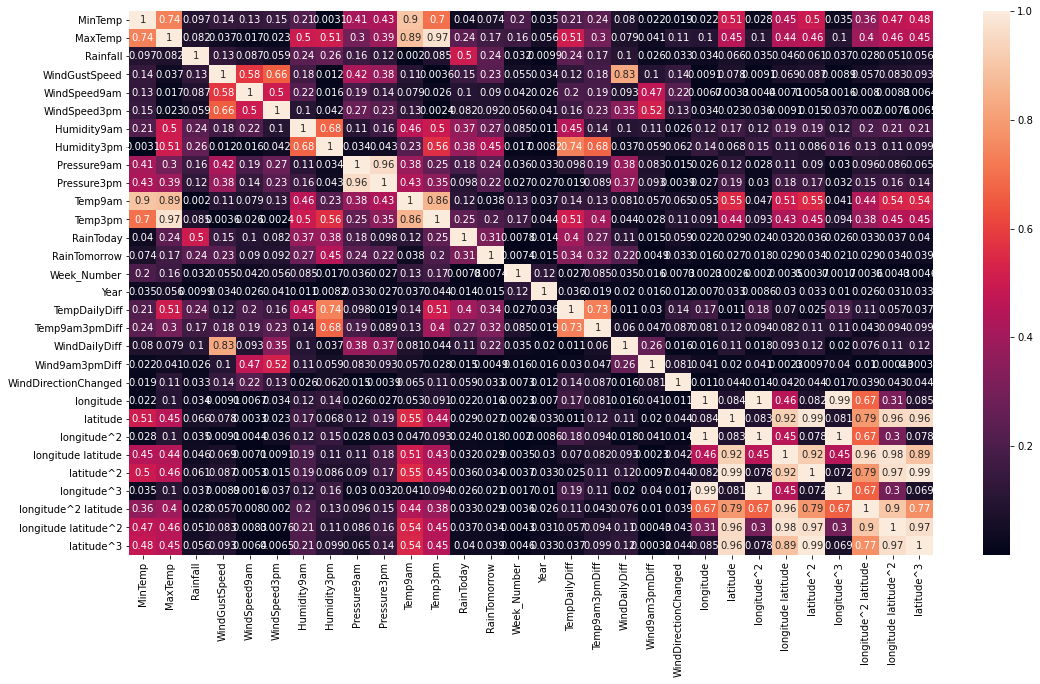

In [241]:
matrix = chosen_dataset.corr()
matrix
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(matrix.abs(), annot = True)

In [242]:
G = nx.Graph()
for i in matrix.columns:
    print(i)
    G.add_node(i)
pos = nx.circular_layout(G)
for i in matrix.columns:
    for j in matrix.columns:
        if i != j and matrix[i][j] != 'nan' and abs(matrix[i][j]) > 0.50 :
            G.add_edge(i, j)
            
edge_x = []
edge_y = []
weights = []
edge_trace = []
for edge in G.edges:
    print(edge)
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    
    trace = go.Scatter(x = [x0, x1, None],
                       y = [y0, y1, None],
                       line = dict(width = (abs(matrix[edge[0]][edge[1]])**10+0.5),
                                   color = 'blue' if matrix[edge[0]][edge[1]] > 0 else 'red',
                                   dash= 'solid' if matrix[edge[0]][edge[1]] > 0 else 'dot'),
                       hoverinfo = 'none',
                       mode = 'lines',
                       line_shape='spline')
    edge_trace.append(trace)
    
node_x = []
node_y = []
for node in pos:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
            color='LightSkyBlue',
            size=20,
    ),
    textfont=dict(
        family="sans serif",
        size=16,
    )
)

node_text = []
for node in G.nodes():
    node_text.append(node)
node_trace.text = node_text

fig = go.Figure(data=[node_trace],
             layout=go.Layout(
                title='<br>Correlations between chosen attributes',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=4),
                autosize=False,
                width=1000,
                height=1000,
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
for trace in edge_trace:
    fig.add_trace(trace)
fig.show()

MinTemp
MaxTemp
Rainfall
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm
RainToday
RainTomorrow
Week_Number
Year
TempDailyDiff
Temp9am3pmDiff
WindDailyDiff
Wind9am3pmDiff
WindDirectionChanged
longitude
latitude
longitude^2
longitude latitude
latitude^2
longitude^3
longitude^2 latitude
longitude latitude^2
latitude^3
('MinTemp', 'MaxTemp')
('MinTemp', 'Temp9am')
('MinTemp', 'Temp3pm')
('MinTemp', 'latitude')
('MaxTemp', 'Humidity9am')
('MaxTemp', 'Humidity3pm')
('MaxTemp', 'Temp9am')
('MaxTemp', 'Temp3pm')
('MaxTemp', 'TempDailyDiff')
('Rainfall', 'RainToday')
('WindGustSpeed', 'WindSpeed9am')
('WindGustSpeed', 'WindSpeed3pm')
('WindGustSpeed', 'WindDailyDiff')
('WindSpeed9am', 'WindSpeed3pm')
('WindSpeed3pm', 'Wind9am3pmDiff')
('Humidity9am', 'Humidity3pm')
('Humidity3pm', 'Temp3pm')
('Humidity3pm', 'TempDailyDiff')
('Humidity3pm', 'Temp9am3pmDiff')
('Pressure9am', 'Pressure3pm')
('Temp9am', 'Temp3pm')
('Temp9am', 'latitude')
('Te

In [243]:
what = 'RainTomorrow'
winds = chosen_dataset.groupby('WindDir9am')[what].mean()
winds = winds.reindex(['N','NNE','NE','ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW' ,'NNW'])
winds = pd.DataFrame({'WindDir9am':winds.index, what:winds.values})

#winds

In [244]:
fig = px.bar_polar(winds, r=what, theta='WindDir9am',
                   template="plotly_dark",
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()
